# prepare environment

## connect to google drive (optional)

In [2]:
import os
def check_path(path):
  path = os.path.normpath(os.path.abspath(path)).replace('\\','/')
  _split = path.split("/")
  for i in range(1,len(_split)):
    _filename,_path_to_file,_path = _split[i],"/".join(_split[:i+1]),"/".join(_split[:i])
    assert os.path.exists(_path_to_file),f"{_filename} doest not exist in {_path}"

#aller dans le dossier de travail 
from google.colab import drive
import os
drive.mount('/gdrive')

drive_path = '/gdrive/My Drive/'
shared_path = drive_path + 'Colab Notebooks/OTHERS/LAS_Converter'
check_path(shared_path) #check if dir exists
print("test passed")
os.chdir(shared_path) #change 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
test passed


In [2]:
! ls

600000.las  data		  markdown_printer.py  __pycache__  test.las
90000.las   LAS_CSV_Converter.py  output	       test.ipynb


## download some las/laz files into *data* dir

In [40]:
# dowload some files
! git clone https://github.com/laspy/laspy
! mv "laspy/tests/data/" "data"
! sudo rm -r laspy/
! rm -r "data/data"

Cloning into 'laspy'...
remote: Enumerating objects: 4622, done.
remote: Counting objects: 100% (872/872), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 4622 (delta 681), reused 755 (delta 632), pack-reused 3750
Receiving objects: 100% (4622/4622), 2.66 MiB | 6.70 MiB/s, done.
Resolving deltas: 100% (2861/2861), done.


## install some modules

Python 3.10.12

In [4]:
! pip install tabulate==0.8.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
! pip install laspy[lazrs,laszip]==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install pandas==1.5.3
! pip install matplotlib==3.7.1

In [6]:
%%writefile markdown_printer.py

from IPython.display import display, Markdown
from tabulate import tabulate
from IPython import get_ipython

def map_list_to_str(data:list):
    return list(map(str, data))

class MarkdownPrinter:
    _instance = None

    def __new__(cls):
        if cls._instance is None:
            cls._instance = super().__new__(cls)
        return cls._instance

    def __init__(self):
        self.columns = []
        self.text = ""
    
    def clean_table(self):
        if not self.columns: return ""
        text = tabulate(self.columns[1:], self.columns[0], tablefmt='pipe')
        self.columns = []
        return text

    def __add_text__(self, text):
        table_text = self.clean_table()
        if table_text: self.text += "\n\n"+ table_text
        if text: self.text += "\n\n" + text
    
    # def __add_table__(self):
    #     if not self.columns: return
    #     self.__add_text__(tabulate(self.columns[1:], self.columns[0], tablefmt='pipe'), is_table=True)
    #     self.columns = []
    
    def print(self, *markdown_texts):
        self.__add_text__(" ".join(map_list_to_str(markdown_texts)))

    def add_header(self, *headers):
        self.__add_text__("")
        self.columns = [map_list_to_str(headers)]

    def add_row(self, *cells):
        assert self.columns
        assert isinstance(self.columns[-1], list)
        assert len(cells)==len(self.columns[-1])
        self.columns.append(map_list_to_str(cells))

    def show(self):
        self.__add_text__("")
        if not self.text: return
        display(Markdown(self.text))
        self.text = ""

printf = print
printer=MarkdownPrinter()
print = printer.print
print_header = printer.add_header
print_row = printer.add_row
show = printer.show



if __name__ == '__main__':
    markdown_text = """
    # Heading

    This is some **bold** text.

    - List item 1
    - List item 2
    """

    print(markdown_text)

    print_header("col1", "col2")
    print_row("1", "2999")
    print_row(8, 7)

    print(markdown_text)

    print_header("col1", "col2")
    print_row("1", "2999")
    print_row(8, 7)



Overwriting markdown_printer.py


In [51]:
from IPython import get_ipython
from markdown_printer import MarkdownPrinter, printf, print, print_header, print_row, show
get_ipython().events.register('post_run_cell', show)

In [52]:
import laspy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

See the documentation for more information about the changes https://laspy.readthedocs.io/en/latest/
- To read a file do: `las = laspy.read('somefile.laz')`
- To create a new LAS data do: `las = laspy.create(point_format=2, file_version='1.2')`
- To write a file previously read or created: `las.write('somepath.las')`

In [9]:
! ls -l data

total 2874
-rw------- 1 root root  32381 Jun  9 21:55 1_4_w_evlr.las
-rw------- 1 root root   8948 Jun  9 21:55 1_4_w_evlr.laz
-rw------- 1 root root   4970 Jun  9 21:55 autzen_geo_proj.las
-rw------- 1 root root   4962 Jun  9 21:55 autzen.las
-rw------- 1 root root 603353 Jun  9 21:55 autzen_trim.laz
drwx------ 2 root root   4096 Jun  9 22:03 data
-rw------- 1 root root  66354 Jun  9 21:55 extrabytes.las
-rw------- 1 root root  29084 Jun  9 21:55 extra.laz
-rw------- 1 root root 763642 Jun  9 21:55 file_with_both_wkt_and_geotiff_vlrs.las
-rw------- 1 root root  59344 Jun  9 21:55 plane.laz
-rw------- 1 root root  30047 Jun  9 21:55 simple1_1.las
-rw------- 1 root root  62888 Jun  9 21:55 simple1_3.las
-rw------- 1 root root 814388 Jun  9 21:55 simple1_4.las
-rw------- 1 root root  33684 Jun  9 21:55 simple.copc.laz
-rw------- 1 root root  36437 Jun  9 21:55 simple.las
-rw------- 1 root root  18217 Jun  9 21:55 simple.laz
-rw------- 1 root root  33716 Jun  9 21:55 simple_with_page.copc

# Data Engenieering

## look into some files

In [165]:
!ls data -lS

total 2870
-rw------- 1 root root 814388 Jun  9 21:55 simple1_4.las
-rw------- 1 root root 763642 Jun  9 21:55 file_with_both_wkt_and_geotiff_vlrs.las
-rw------- 1 root root 603353 Jun  9 21:55 autzen_trim.laz
-rw------- 1 root root 299359 Jun  9 21:55 vegetation_1_3.las
-rw------- 1 root root  66354 Jun  9 21:55 extrabytes.las
-rw------- 1 root root  62888 Jun  9 21:55 simple1_3.las
-rw------- 1 root root  59344 Jun  9 21:55 plane.laz
-rw------- 1 root root  36437 Jun  9 21:55 simple.las
-rw------- 1 root root  33716 Jun  9 21:55 simple_with_page.copc.laz
-rw------- 1 root root  33684 Jun  9 21:55 simple.copc.laz
-rw------- 1 root root  32381 Jun  9 21:55 1_4_w_evlr.las
-rw------- 1 root root  32305 Jun  9 21:55 test1_4.las
-rw------- 1 root root  30047 Jun  9 21:55 simple1_1.las
-rw------- 1 root root  29084 Jun  9 21:55 extra.laz
-rw------- 1 root root  18217 Jun  9 21:55 simple.laz
-rw------- 1 root root   8948 Jun  9 21:55 1_4_w_evlr.laz
-rw------- 1 root root   4970 Jun  9 21:55 

In [54]:
laz_filepath = 'data/autzen_trim.laz'

### meta data

In [55]:
with laspy.open(laz_filepath) as fh:
    print("## header")
    for key in ['x_max', 'x_min', 'x_offset', 'x_scale', 'y_max', 'y_min', 'y_offset', 'y_scale', 'z_max', 'z_min', 'z_offset', 'z_scale']:
        print(f'- {key} = {getattr(fh.header, key)}')




## header

- x_max = 637179.2200000001

- x_min = 636001.76

- x_offset = 0.0

- x_scale = 0.01

- y_max = 849497.9

- y_min = 848935.2000000001

- y_offset = 0.0

- y_scale = 0.01

- z_max = 520.51

- z_min = 406.26

- z_offset = 0.0

- z_scale = 0.01

### nb of return points and classification

In [13]:
las = laspy.read(laz_filepath)
print('Points from Header:', las.header.point_count)
print(f"las = {las}")
print(f"Points from data: = {len(las.points)}")
ground_pts = las.classification == 2
print(f"### ground_pts")
bins, counts = np.unique(las.return_number[ground_pts], return_counts=True)
print('#### Ground Point Return Number distribution:')
print_header('Return Number', 'Count')
for r,c in zip(bins,counts):
    print_row(r, c)
print(f"### all_pts")
bins, counts = np.unique(las.return_number, return_counts=True)
print('#### All Points Return Number distribution:')
print_header('Return Number', 'Count')
for r,c in zip(bins,counts):
    print_row(r, c)




Points from Header: 110000

las = <LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 110000 points, 5 vlrs)>

Points from data: = 110000

### ground_pts

#### Ground Point Return Number distribution:

|   Return Number |   Count |
|----------------:|--------:|
|               1 |   23733 |
|               2 |    1799 |
|               3 |     521 |
|               4 |      54 |

### all_pts

#### All Points Return Number distribution:

|   Return Number |   Count |
|----------------:|--------:|
|               1 |   99257 |
|               2 |    9021 |
|               3 |    1623 |
|               4 |      99 |

## check the attribute of the object parsed by laspy

In [44]:
infile = laspy.read("data/autzen_trim.laz")

In [26]:
list(infile.y)[:5]

[849393.9500000001, 849396.9500000001, 849400.84, 849404.62, 849407.37]

In [27]:
list(infile.x)[:5]

[637177.98, 637177.3, 637176.34, 637175.4500000001, 637174.33]

In [45]:
header = infile.header
version = header.version
point_format = header.point_format
point_count = header.point_count
scale = header.scale
offset = header.offset

In [103]:
import inspect
def rec_dir(obj, n=0):
  if n > 2: return
  for key in dir(obj):
    if key.startswith("__"): continue
    try:
      att = getattr(obj, key)
    except:
      continue
    if inspect.isfunction(att): continue
    if isinstance(att, type(print)): continue
    if isinstance(att, type(len)): continue
    print("  "*n + f"- {key} : {type(att)}")
    if inspect.isgenerator(att):
      att = list(att)
    if isinstance(att, (str, int, np.float, np.int)): 
      print("  "*(n+1) + f">val={att}")
    elif isinstance(att, (np.ndarray,)): 
      print("  "*(n+1) + f">shape={att.shape} content-type={att.dtype} vals={att[:2]}{att[-2:]}")
    elif isinstance(att, (list,)): 
      if att: 
        print("  "*(n+1) + f">len={len(att)} content-type={type(att[0])} vals={att[:2]}{att[-2:]}")
        rec_dir(att[0], n+1)
    else:
      rec_dir(att, n+1)

rec_dir(infile)

<ipython-input-103-97cdd3180461>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(att, (str, int, np.float, np.int)):
<ipython-input-103-97cdd3180461>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isi



- _points : <class 'laspy.point.record.ScaleAwarePointRecord'>

  - array : <class 'numpy.ndarray'>

    >shape=(110000,) content-type=[('X', '<i4'), ('Y', '<i4'), ('Z', '<i4'), ('intensity', '<u2'), ('bit_fields', 'u1'), ('raw_classification', 'u1'), ('scan_angle_rank', 'i1'), ('user_data', 'u1'), ('point_source_id', '<u2'), ('gps_time', '<f8'), ('red', '<u2'), ('green', '<u2'), ('blue', '<u2')] vals=[(63717798, 84939395, 41119,  4, 9, 1, -17, 128, 7326, 245379.39843683, 84, 102, 93)
 (63717730, 84939695, 41125, 24, 9, 1, -17, 128, 7326, 245379.39846711, 82,  98, 90)][(63603832, 84933530, 42385,  87, 9, 1, -8, 124, 7326, 245385.91111092, 70, 80, 74)
 (63603788, 84933694, 42320, 100, 9, 1, -9, 124, 7326, 245385.91112104, 64, 74, 70)]

  - offsets : <class 'numpy.ndarray'>

    >shape=(3,) content-type=float64 vals=[0. 0.][0. 0.]

  - point_format : <class 'laspy.point.format.PointFormat'>

    - dimension_names : <class 'generator'>

      >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

    - dimensions : <class 'list'>

      >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

    - extra_dimension_names : <class 'generator'>

    - extra_dimensions : <class 'generator'>

    - has_waveform_packet : <class 'bool'>

      >val=False

    - id : <class 'int'>

      >val=3

    - num_extra_bytes : <class 'int'>

      >val=0

    - num_standard_bytes : <class 'int'>

      >val=34

    - size : <class 'int'>

      >val=34

    - standard_dimension_names : <class 'generator'>

      >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

    - standard_dimensions : <class 'generator'>

      >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

  - point_size : <class 'int'>

    >val=34

  - scales : <class 'numpy.ndarray'>

    >shape=(3,) content-type=float64 vals=[0.01 0.01][0.01 0.01]

  - sub_fields_dict : <class 'dict'>

- evlrs : <class 'NoneType'>

- header : <class 'laspy.header.LasHeader'>

  - DEFAULT_POINT_FORMAT : <class 'laspy.point.format.PointFormat'>

    - dimension_names : <class 'generator'>

      >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

    - dimensions : <class 'list'>

      >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

    - extra_dimension_names : <class 'generator'>

    - extra_dimensions : <class 'generator'>

    - has_waveform_packet : <class 'bool'>

      >val=False

    - id : <class 'int'>

      >val=3

    - num_extra_bytes : <class 'int'>

      >val=0

    - num_standard_bytes : <class 'int'>

      >val=34

    - size : <class 'int'>

      >val=34

    - standard_dimension_names : <class 'generator'>

      >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

    - standard_dimensions : <class 'generator'>

      >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

  - DEFAULT_VERSION : <class 'laspy.header.Version'>

    - _field_defaults : <class 'dict'>

    - _fields : <class 'tuple'>

    - major : <class 'int'>

      >val=1

    - minor : <class 'int'>

      >val=2

  - _OLD_LASPY_NAMES : <class 'dict'>

  - _point_format : <class 'laspy.point.format.PointFormat'>

    - dimension_names : <class 'generator'>

      >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

    - dimensions : <class 'list'>

      >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

    - extra_dimension_names : <class 'generator'>

    - extra_dimensions : <class 'generator'>

    - has_waveform_packet : <class 'bool'>

      >val=False

    - id : <class 'int'>

      >val=3

    - num_extra_bytes : <class 'int'>

      >val=0

    - num_standard_bytes : <class 'int'>

      >val=34

    - size : <class 'int'>

      >val=34

    - standard_dimension_names : <class 'generator'>

      >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

    - standard_dimensions : <class 'generator'>

      >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

  - _version : <class 'laspy.header.Version'>

    - _field_defaults : <class 'dict'>

    - _fields : <class 'tuple'>

    - major : <class 'int'>

      >val=1

    - minor : <class 'int'>

      >val=2

  - _vlrs : <class 'laspy.vlrs.vlrlist.VLRList'>

    >len=5 content-type=<class 'laspy.vlrs.known.GeoKeyDirectoryVlr'> vals=[<GeoKeyDirectoryVlr(22 geo_keys)>, <GeoDoubleParamsVlr([c_double(41.75), c_double(-120.5), c_double(43.0), c_double(45.5), c_double(1312335.958005249), c_double(0.0), c_double(298.257222101), c_double(6378137.0), c_double(0.0)])>][<laspy.vlrs.known.WktCoordinateSystemVlr object at 0x7f3469076f50>, <VLR(user_id: 'liblas', record_id: '2112', data len: 593)>]

    - _abc_impl : <class '_abc._abc_data'>

    - _description : <class 'str'>

      >val=GeoTiff GeoKeyDirectoryTag

    - _record_id : <class 'int'>

      >val=34735

    - _user_id : <class 'str'>

      >val=LASF_Projection

    - description : <class 'str'>

      >val=GeoTiff GeoKeyDirectoryTag

    - geo_keys : <class 'list'>

      >len=22 content-type=<class 'laspy.vlrs.known.GeoKeyEntryStruct'> vals=[<GeoKey(Id: 1024, Location: 0, count: 1, offset: 1)>, <GeoKey(Id: 1025, Location: 0, count: 1, offset: 1)>][<GeoKey(Id: 3087, Location: 34736, count: 1, offset: 5)>, <GeoKey(Id: 0, Location: 0, count: 0, offset: 0)>]

    - geo_keys_header : <class 'laspy.vlrs.known.GeoKeysHeaderStructs'>

    - record_id : <class 'int'>

      >val=34735

    - user_id : <class 'str'>

      >val=LASF_Projection

  - are_points_compressed : <class 'bool'>

    >val=True

  - creation_date : <class 'datetime.date'>

    - day : <class 'int'>

      >val=10

    - max : <class 'datetime.date'>

    - min : <class 'datetime.date'>

    - month : <class 'int'>

      >val=9

    - resolution : <class 'datetime.timedelta'>

    - year : <class 'int'>

      >val=2015

  - evlrs : <class 'NoneType'>

  - extra_header_bytes : <class 'bytes'>

  - extra_vlr_bytes : <class 'bytes'>

  - file_source_id : <class 'int'>

    >val=0

  - generating_software : <class 'str'>

    >val=PDAL 1.0.0 (9e8465)

  - global_encoding : <class 'laspy.header.GlobalEncoding'>

    - GPS_TIME_TYPE_MASK : <class 'int'>

      >val=1

    - SYNTHETIC_RETURN_NUMBERS_MASK : <class 'int'>

      >val=8

    - WAVEFORM_EXTERNAL_MASK : <class 'int'>

      >val=4

    - WAVEFORM_INTERNAL_MASK : <class 'int'>

      >val=2

    - WKT_MASK : <class 'int'>

      >val=16

    - gps_time_type : <enum 'GpsTimeType'>

      >val=0

    - synthetic_return_numbers : <class 'bool'>

      >val=False

    - value : <class 'int'>

      >val=0

    - waveform_data_packets_external : <class 'bool'>

      >val=False

    - waveform_data_packets_internal : <class 'bool'>

      >val=False

    - wkt : <class 'bool'>

      >val=False

  - major_version : <class 'int'>

    >val=1

  - maxs : <class 'numpy.ndarray'>

    >shape=(3,) content-type=float64 vals=[637179.22 849497.9 ][8.494979e+05 5.205100e+02]

  - minor_version : <class 'int'>

    >val=2

  - mins : <class 'numpy.ndarray'>

    >shape=(3,) content-type=float64 vals=[636001.76 848935.2 ][8.489352e+05 4.062600e+02]

  - number_of_evlrs : <class 'int'>

    >val=0

  - number_of_points_by_return : <class 'numpy.ndarray'>

    >shape=(15,) content-type=uint32 vals=[99257  9021][0 0]

  - offset_to_point_data : <class 'int'>

    >val=2144

  - offsets : <class 'numpy.ndarray'>

    >shape=(3,) content-type=float64 vals=[0. 0.][0. 0.]

  - point_count : <class 'int'>

    >val=110000

  - point_format : <class 'laspy.point.format.PointFormat'>

    - dimension_names : <class 'generator'>

      >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

    - dimensions : <class 'list'>

      >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

    - extra_dimension_names : <class 'generator'>

    - extra_dimensions : <class 'generator'>

    - has_waveform_packet : <class 'bool'>

      >val=False

    - id : <class 'int'>

      >val=3

    - num_extra_bytes : <class 'int'>

      >val=0

    - num_standard_bytes : <class 'int'>

      >val=34

    - size : <class 'int'>

      >val=34

    - standard_dimension_names : <class 'generator'>

      >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

    - standard_dimensions : <class 'generator'>

      >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

  - scales : <class 'numpy.ndarray'>

    >shape=(3,) content-type=float64 vals=[0.01 0.01][0.01 0.01]

  - start_of_first_evlr : <class 'int'>

    >val=0

  - start_of_waveform_data_packet_record : <class 'int'>

    >val=0

  - system_identifier : <class 'str'>

    >val=PDAL

  - uuid : <class 'uuid.UUID'>

    - bytes : <class 'bytes'>

    - bytes_le : <class 'bytes'>

    - clock_seq : <class 'int'>

      >val=0

    - clock_seq_hi_variant : <class 'int'>

      >val=0

    - clock_seq_low : <class 'int'>

      >val=0

    - fields : <class 'tuple'>

    - hex : <class 'str'>

      >val=00000000000000000000000000000000

    - int : <class 'int'>

      >val=0

    - is_safe : <enum 'SafeUUID'>

    - node : <class 'int'>

      >val=0

    - time : <class 'int'>

      >val=0

    - time_hi_version : <class 'int'>

      >val=0

    - time_low : <class 'int'>

      >val=0

    - time_mid : <class 'int'>

      >val=0

    - urn : <class 'str'>

      >val=urn:uuid:00000000-0000-0000-0000-000000000000

    - variant : <class 'str'>

      >val=reserved for NCS compatibility

    - version : <class 'NoneType'>

  - version : <class 'laspy.header.Version'>

    - _field_defaults : <class 'dict'>

    - _fields : <class 'tuple'>

    - major : <class 'int'>

      >val=1

    - minor : <class 'int'>

      >val=2

  - vlrs : <class 'laspy.vlrs.vlrlist.VLRList'>

    >len=5 content-type=<class 'laspy.vlrs.known.GeoKeyDirectoryVlr'> vals=[<GeoKeyDirectoryVlr(22 geo_keys)>, <GeoDoubleParamsVlr([c_double(41.75), c_double(-120.5), c_double(43.0), c_double(45.5), c_double(1312335.958005249), c_double(0.0), c_double(298.257222101), c_double(6378137.0), c_double(0.0)])>][<laspy.vlrs.known.WktCoordinateSystemVlr object at 0x7f3469076f50>, <VLR(user_id: 'liblas', record_id: '2112', data len: 593)>]

    - _abc_impl : <class '_abc._abc_data'>

    - _description : <class 'str'>

      >val=GeoTiff GeoKeyDirectoryTag

    - _record_id : <class 'int'>

      >val=34735

    - _user_id : <class 'str'>

      >val=LASF_Projection

    - description : <class 'str'>

      >val=GeoTiff GeoKeyDirectoryTag

    - geo_keys : <class 'list'>

      >len=22 content-type=<class 'laspy.vlrs.known.GeoKeyEntryStruct'> vals=[<GeoKey(Id: 1024, Location: 0, count: 1, offset: 1)>, <GeoKey(Id: 1025, Location: 0, count: 1, offset: 1)>][<GeoKey(Id: 3087, Location: 34736, count: 1, offset: 5)>, <GeoKey(Id: 0, Location: 0, count: 0, offset: 0)>]

    - geo_keys_header : <class 'laspy.vlrs.known.GeoKeysHeaderStructs'>

    - record_id : <class 'int'>

      >val=34735

    - user_id : <class 'str'>

      >val=LASF_Projection

  - x_max : <class 'numpy.float64'>

    >val=637179.2200000001

  - x_min : <class 'numpy.float64'>

    >val=636001.76

  - x_offset : <class 'numpy.float64'>

    >val=0.0

  - x_scale : <class 'numpy.float64'>

    >val=0.01

  - y_max : <class 'numpy.float64'>

    >val=849497.9

  - y_min : <class 'numpy.float64'>

    >val=848935.2000000001

  - y_offset : <class 'numpy.float64'>

    >val=0.0

  - y_scale : <class 'numpy.float64'>

    >val=0.01

  - z_max : <class 'numpy.float64'>

    >val=520.51

  - z_min : <class 'numpy.float64'>

    >val=406.26

  - z_offset : <class 'numpy.float64'>

    >val=0.0

  - z_scale : <class 'numpy.float64'>

    >val=0.01

- point_format : <class 'laspy.point.format.PointFormat'>

  - dimension_names : <class 'generator'>

    >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

  - dimensions : <class 'list'>

    >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

    - _field_defaults : <class 'dict'>

    - _fields : <class 'tuple'>

    - description : <class 'str'>

      >val=

    - dtype : <class 'numpy.dtype[int32]'>

    - is_scaled : <class 'bool'>

      >val=False

    - is_standard : <class 'bool'>

      >val=True

    - kind : <enum 'DimensionKind'>

    - max : <class 'int'>

      >val=2147483647

    - min : <class 'int'>

      >val=-2147483648

    - name : <class 'str'>

      >val=X

    - num_bits : <class 'int'>

      >val=32

    - num_bytes : <class 'int'>

      >val=4

    - num_bytes_singular_element : <class 'int'>

      >val=4

    - num_elements : <class 'int'>

      >val=1

    - offsets : <class 'NoneType'>

    - scales : <class 'NoneType'>

  - extra_dimension_names : <class 'generator'>

  - extra_dimensions : <class 'generator'>

  - has_waveform_packet : <class 'bool'>

    >val=False

  - id : <class 'int'>

    >val=3

  - num_extra_bytes : <class 'int'>

    >val=0

  - num_standard_bytes : <class 'int'>

    >val=34

  - size : <class 'int'>

    >val=34

  - standard_dimension_names : <class 'generator'>

    >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

  - standard_dimensions : <class 'generator'>

    >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

    - _field_defaults : <class 'dict'>

    - _fields : <class 'tuple'>

    - description : <class 'str'>

      >val=

    - dtype : <class 'numpy.dtype[int32]'>

    - is_scaled : <class 'bool'>

      >val=False

    - is_standard : <class 'bool'>

      >val=True

    - kind : <enum 'DimensionKind'>

    - max : <class 'int'>

      >val=2147483647

    - min : <class 'int'>

      >val=-2147483648

    - name : <class 'str'>

      >val=X

    - num_bits : <class 'int'>

      >val=32

    - num_bytes : <class 'int'>

      >val=4

    - num_bytes_singular_element : <class 'int'>

      >val=4

    - num_elements : <class 'int'>

      >val=1

    - offsets : <class 'NoneType'>

    - scales : <class 'NoneType'>

- points : <class 'laspy.point.record.ScaleAwarePointRecord'>

  - array : <class 'numpy.ndarray'>

    >shape=(110000,) content-type=[('X', '<i4'), ('Y', '<i4'), ('Z', '<i4'), ('intensity', '<u2'), ('bit_fields', 'u1'), ('raw_classification', 'u1'), ('scan_angle_rank', 'i1'), ('user_data', 'u1'), ('point_source_id', '<u2'), ('gps_time', '<f8'), ('red', '<u2'), ('green', '<u2'), ('blue', '<u2')] vals=[(63717798, 84939395, 41119,  4, 9, 1, -17, 128, 7326, 245379.39843683, 84, 102, 93)
 (63717730, 84939695, 41125, 24, 9, 1, -17, 128, 7326, 245379.39846711, 82,  98, 90)][(63603832, 84933530, 42385,  87, 9, 1, -8, 124, 7326, 245385.91111092, 70, 80, 74)
 (63603788, 84933694, 42320, 100, 9, 1, -9, 124, 7326, 245385.91112104, 64, 74, 70)]

  - offsets : <class 'numpy.ndarray'>

    >shape=(3,) content-type=float64 vals=[0. 0.][0. 0.]

  - point_format : <class 'laspy.point.format.PointFormat'>

    - dimension_names : <class 'generator'>

      >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

    - dimensions : <class 'list'>

      >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

    - extra_dimension_names : <class 'generator'>

    - extra_dimensions : <class 'generator'>

    - has_waveform_packet : <class 'bool'>

      >val=False

    - id : <class 'int'>

      >val=3

    - num_extra_bytes : <class 'int'>

      >val=0

    - num_standard_bytes : <class 'int'>

      >val=34

    - size : <class 'int'>

      >val=34

    - standard_dimension_names : <class 'generator'>

      >len=19 content-type=<class 'str'> vals=['X', 'Y']['green', 'blue']

    - standard_dimensions : <class 'generator'>

      >len=19 content-type=<class 'laspy.point.dims.DimensionInfo'> vals=[DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)][DimensionInfo(name='green', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None), DimensionInfo(name='blue', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)]

  - point_size : <class 'int'>

    >val=34

  - scales : <class 'numpy.ndarray'>

    >shape=(3,) content-type=float64 vals=[0.01 0.01][0.01 0.01]

  - sub_fields_dict : <class 'dict'>

- vlrs : <class 'laspy.vlrs.vlrlist.VLRList'>

  >len=5 content-type=<class 'laspy.vlrs.known.GeoKeyDirectoryVlr'> vals=[<GeoKeyDirectoryVlr(22 geo_keys)>, <GeoDoubleParamsVlr([c_double(41.75), c_double(-120.5), c_double(43.0), c_double(45.5), c_double(1312335.958005249), c_double(0.0), c_double(298.257222101), c_double(6378137.0), c_double(0.0)])>][<laspy.vlrs.known.WktCoordinateSystemVlr object at 0x7f3469076f50>, <VLR(user_id: 'liblas', record_id: '2112', data len: 593)>]

  - _abc_impl : <class '_abc._abc_data'>

  - _description : <class 'str'>

    >val=GeoTiff GeoKeyDirectoryTag

  - _record_id : <class 'int'>

    >val=34735

  - _user_id : <class 'str'>

    >val=LASF_Projection

  - description : <class 'str'>

    >val=GeoTiff GeoKeyDirectoryTag

  - geo_keys : <class 'list'>

    >len=22 content-type=<class 'laspy.vlrs.known.GeoKeyEntryStruct'> vals=[<GeoKey(Id: 1024, Location: 0, count: 1, offset: 1)>, <GeoKey(Id: 1025, Location: 0, count: 1, offset: 1)>][<GeoKey(Id: 3087, Location: 34736, count: 1, offset: 5)>, <GeoKey(Id: 0, Location: 0, count: 0, offset: 0)>]

    - _b_base_ : <class 'NoneType'>

    - _b_needsfree_ : <class 'int'>

      >val=0

    - _fields_ : <class 'list'>

      >len=4 content-type=<class 'tuple'> vals=[('id', <class 'ctypes.c_ushort'>), ('tiff_tag_location', <class 'ctypes.c_ushort'>)][('count', <class 'ctypes.c_ushort'>), ('value_offset', <class 'ctypes.c_ushort'>)]

    - _objects : <class 'dict'>

    - _pack_ : <class 'int'>

      >val=1

    - count : <class 'int'>

      >val=1

    - id : <class 'int'>

      >val=1024

    - tiff_tag_location : <class 'int'>

      >val=0

    - value_offset : <class 'int'>

      >val=1

  - geo_keys_header : <class 'laspy.vlrs.known.GeoKeysHeaderStructs'>

    - _b_base_ : <class 'NoneType'>

    - _b_needsfree_ : <class 'int'>

      >val=0

    - _fields_ : <class 'list'>

      >len=4 content-type=<class 'tuple'> vals=[('key_directory_version', <class 'ctypes.c_ushort'>), ('key_revision', <class 'ctypes.c_ushort'>)][('minor_revision', <class 'ctypes.c_ushort'>), ('number_of_keys', <class 'ctypes.c_ushort'>)]

    - _objects : <class 'dict'>

    - _pack_ : <class 'int'>

      >val=1

    - key_directory_version : <class 'int'>

      >val=1

    - key_revision : <class 'int'>

      >val=1

    - minor_revision : <class 'int'>

      >val=0

    - number_of_keys : <class 'int'>

      >val=22

  - record_id : <class 'int'>

    >val=34735

  - user_id : <class 'str'>

    >val=LASF_Projection

- xyz : <class 'numpy.ndarray'>

  >shape=(110000, 3) content-type=float64 vals=[[6.3717798e+05 8.4939395e+05 4.1119000e+02]
 [6.3717730e+05 8.4939695e+05 4.1125000e+02]][[6.3603832e+05 8.4933530e+05 4.2385000e+02]
 [6.3603788e+05 8.4933694e+05 4.2320000e+02]]

**Breakdown of the information on LAS (Lidar Binary) point cloud file loaded into a Python script using the `laspy` library**

- `points`: This variable holds the point records of the LAS file. It is of type `laspy.point.record.ScaleAwarePointRecord` and has a shape of (110000,).
- `array`: This variable is a numpy array that contains the actual point data. It has a shape of (110000,) and a content type specifying the data types of its fields (e.g., 'X', 'Y', 'Z', 'intensity', 'bit_fields', etc.).
- `offsets`: This variable is a numpy array representing the offsets of the LAS file. It has a shape of (3,) and contains floating-point values.
- `point_format`: This variable represents the format of the LAS point data. It is of type `laspy.point.format.PointFormat` and provides information about the dimensions and properties of the points.
- `dimension_names`: This is a generator object that yields the names of the dimensions in the LAS file.
- `dimensions`: This is a list of `laspy.point.dims.DimensionInfo` objects that describe the dimensions of the LAS points, including their names, data types, and other properties.
- `extra_dimension_names`: This is a generator object that yields the names of any extra dimensions present in the LAS file.
- `extra_dimensions`: This is a generator object that yields the extra dimensions of the LAS points, if any.
- `has_waveform_packet`: This boolean variable indicates whether the LAS file contains waveform packets.
- `num_extra_bytes`: This variable represents the number of extra bytes in the LAS file.
- `num_standard_bytes`: This variable represents the number of standard bytes in the LAS file.
- `size`: This variable represents the size (in bytes) of each point in the LAS file.
- `standard_dimension_names`: This is a generator object that yields the names of the standard dimensions present in the LAS file.
- `standard_dimensions`: This is a generator object that yields the standard dimensions of the LAS points.
- `scales`: This variable is a numpy array that represents the scales for each dimension in the LAS file.
- `header`: This variable holds the header information of the LAS file, including details about the file format, creation date, global encoding, software used, etc.
- `vlrs`: This variable represents the Variable Length Records (VLRs) in the LAS file. It is of type `laspy.vlrs.vlrlist.VLRList` and contains various VLR objects such as GeoKeyDirectoryVlr, GeoDoubleParamsVlr, etc.
- `description`: This variable holds the description of the LAS VLRs.
- `_record_id` and `_user_id`: These variables represent the record ID and user ID of the LAS VLRs, respectively.
- `maxs` and `mins`: These variables are numpy arrays representing the maximum and minimum values of each dimension in the LAS file.
- `number_of_points_by_return`: This variable is a numpy array that contains the number of points classified by return number.
- `offset_to_point_data`: This variable represents the offset to the point data in the LAS file.

## descriptive analysis and visualisation

### convert to pandas object

In [156]:
import laspy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

infile = laspy.read("data/autzen_trim.laz")
# infile = laspy.read("data/simple1_4.las") 

# Read point data into a Pandas DataFrame
point_data = pd.DataFrame({key:list(getattr(infile, key)) for key in infile._points.point_format.dimension_names })

# {
#     "X": las.x,
#     "Y": las.y,
#     "Z": las.z,
#     "Intensity": las.intensity,
#     "Classification": las.raw_classification,
#     "ScanAngle": las.scan_angle_rank,
#     "PointSourceID": las.point_source_id,
#     "GPSTime": las.gps_time,
#     "Red": las.red,
#     "Green": las.green,
#     "Blue": las.blue,
# }

In [146]:
print(point_data.columns)



Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'user_data', 'scan_angle', 'point_source_id', 'gps_time', 'red',
       'green', 'blue'],
      dtype='object')

### basic statistics

In [147]:
# Print basic statistics
print("Number of points:", point_data.shape[0])
print("Data Shape:", point_data.shape)
print("Column-wise summary statistics:")
point_data.describe()

,X,Y,Z,intensity,return_number,number_of_returns,synthetic,key_point,withheld,overlap,...,scan_direction_flag,edge_of_flight_line,classification,user_data,scan_angle,point_source_id,gps_time,red,green,blue
count,2.260000e+04,2.260000e+04,22600.000000,22600.0,22600.0,22600.0,22600.0,22600.0,22600.0,22600.0,...,22600.0,22600.0,22600.0,22600.0,22600.0,22600.0,22600.0,22600.000000,22600.000000,22600.000000
mean,1.125000e+08,4.950000e+08,166228.539823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42554.506195,39100.477168,36623.461947
std,6.524139e+07,2.886671e+08,29194.823861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7473.874908,7429.501330,8234.802038
min,0.000000e+00,0.000000e+00,44000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11264.000000,10496.000000,6656.000000
25%,5.600000e+07,2.475000e+08,160000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40960.000000,37376.000000,35072.000000
50%,1.125000e+08,4.950000e+08,174000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44544.000000,40960.000000,38912.000000
75%,1.690000e+08,7.425000e+08,184000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47104.000000,43776.000000,41728.000000
max,2.250000e+08,9.900000e+08,254000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65024.000000,62464.000000,61440.000000




Number of points: 22600

Data Shape: (22600, 21)

Column-wise summary statistics:

### histogram of intensities

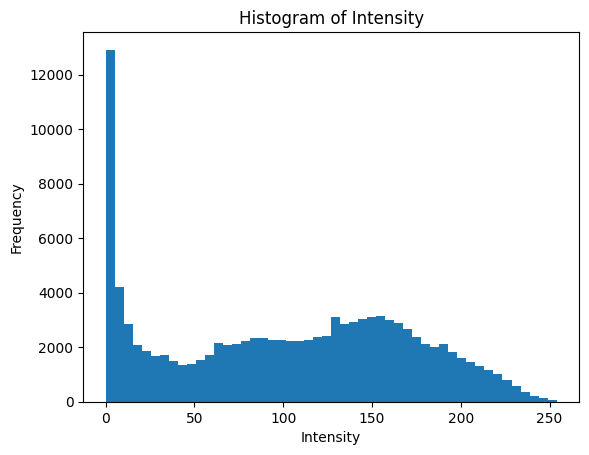

In [113]:
# Plot a histogram of intensities
plt.hist(point_data["intensity"], bins=50)
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.title("Histogram of Intensity")
plt.show()

### scatter plot of X, Y coordinates

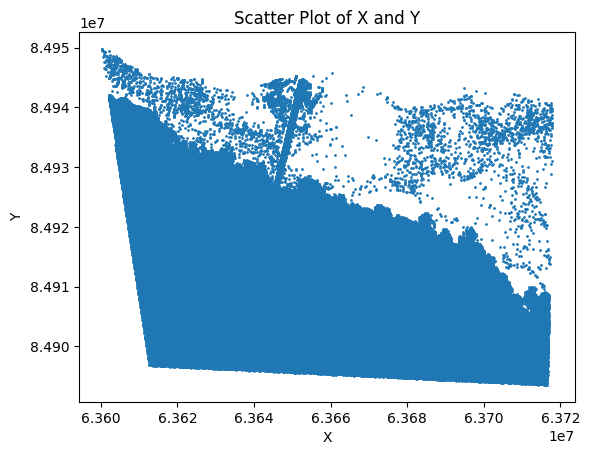

In [114]:
# Plot a scatter plot of X, Y coordinates
plt.scatter(point_data["X"], point_data["Y"], s=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of X and Y")
plt.show()

### 3D scatter plot of X, Y, Z coordinates

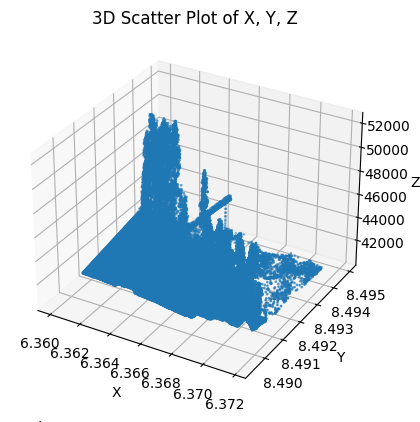

In [116]:

# Plot a 3D scatter plot of X, Y, Z coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(point_data["X"], point_data["Y"], point_data["Z"], s=1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Scatter Plot of X, Y, Z")
plt.show()


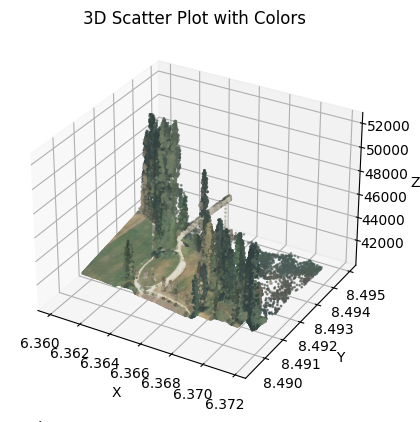

In [142]:
def show_3d_with_colors(point_data):
  # check if there are color data present
  col_att = []
  if len(set(["red", "green", "blue"]) - set(point_data.columns))==0: col_att = ["red", "green", "blue"]
  elif len(set(["intensity"]) - set(point_data.columns))==0: col_att = ["intensity"]
  
  # Plot a 3D scatter plot of X, Y, Z coordinates with colors
  fig = plt.figure()
  ax = fig.add_subplot(111, projection="3d")
  ax.scatter(
      point_data["X"],
      point_data["Y"],
      point_data["Z"],
      c=point_data[col_att].values / 255,  # Normalize RGB values
      s=1
  )
  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_zlabel("Z")
  ax.set_title("3D Scatter Plot with Colors")
  plt.show()

show_3d_with_colors(point_data)

## export files to csv

### show some meta informations and save as csv



**file : data/1_4_w_evlr.las**

- *shape* : (1000, 18)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'user_data', 'scan_angle', 'point_source_id', 'gps_time'],
      dtype='object')

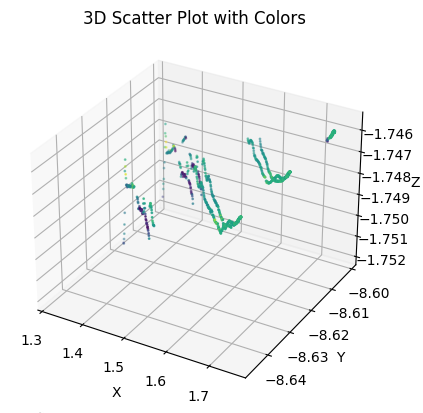



**file : data/1_4_w_evlr.laz**

- *shape* : (1000, 18)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'user_data', 'scan_angle', 'point_source_id', 'gps_time'],
      dtype='object')

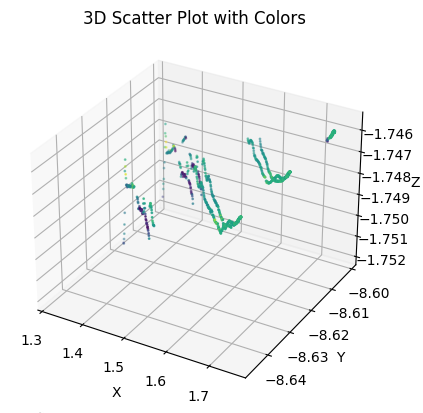



**file : data/autzen.las**

- *shape* : (106, 16)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time'],
      dtype='object')

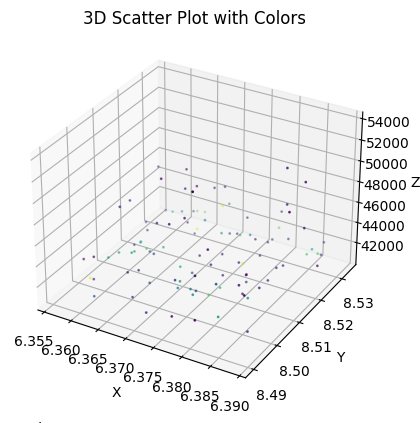



**file : data/autzen_geo_proj.las**

- *shape* : (106, 16)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time'],
      dtype='object')

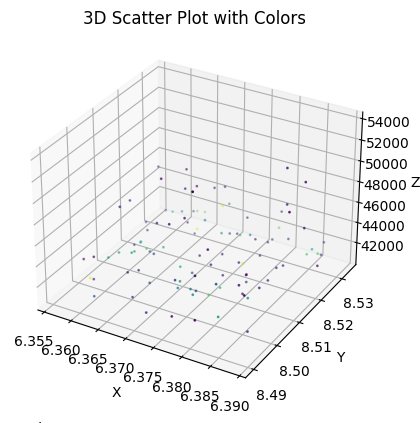



**file : data/autzen_trim.laz**

- *shape* : (110000, 19)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time', 'red', 'green', 'blue'],
      dtype='object')

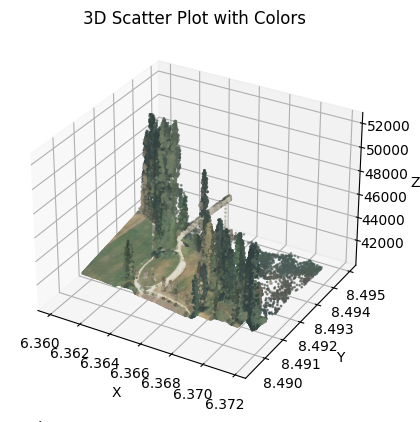



**file : data/extra.laz**

- *shape* : (1065, 24)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time', 'red', 'green', 'blue', 'Colors',
       'Reserved', 'Flags', 'Intensity', 'Time'],
      dtype='object')

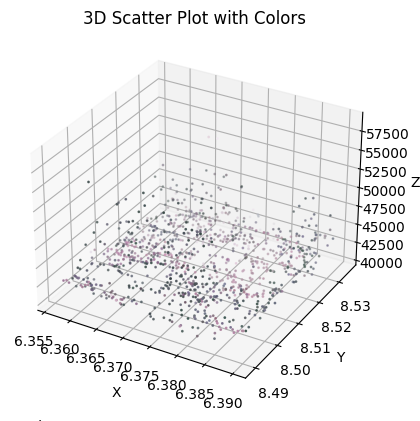



**file : data/extrabytes.las**

- *shape* : (1065, 24)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time', 'red', 'green', 'blue', 'Colors',
       'Reserved', 'Flags', 'Intensity', 'Time'],
      dtype='object')

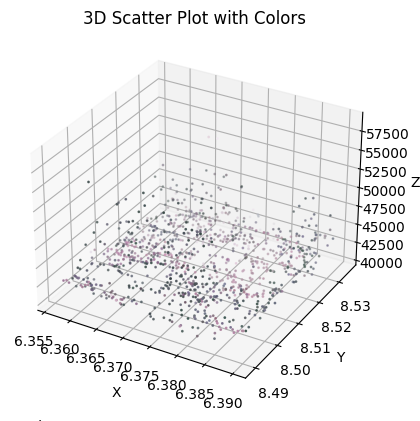



**file : data/file_with_both_wkt_and_geotiff_vlrs.las**

- *shape* : (25408, 18)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'user_data', 'scan_angle', 'point_source_id', 'gps_time'],
      dtype='object')

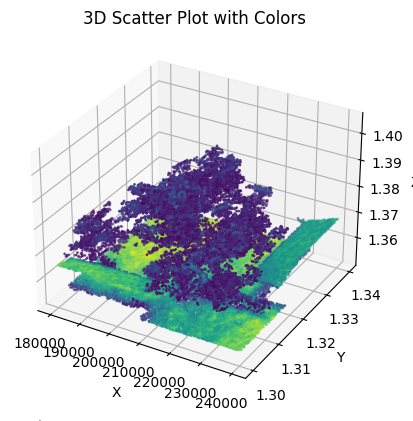



**file : data/plane.laz**

- *shape* : (28185, 19)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time', 'red', 'green', 'blue'],
      dtype='object')

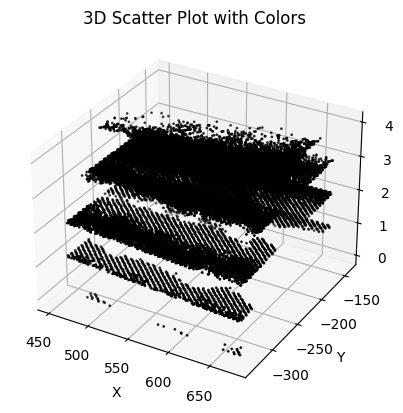



**file : data/simple.copc.laz**

- *shape* : (1065, 21)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'user_data', 'scan_angle', 'point_source_id', 'gps_time', 'red',
       'green', 'blue'],
      dtype='object')

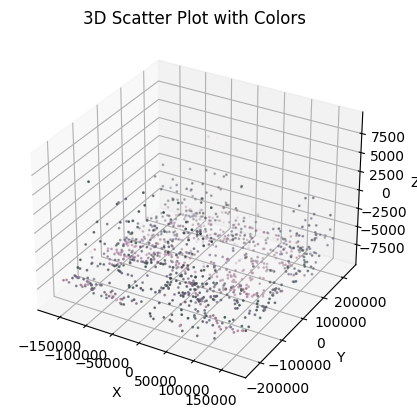



**file : data/simple.las**

- *shape* : (1065, 19)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time', 'red', 'green', 'blue'],
      dtype='object')

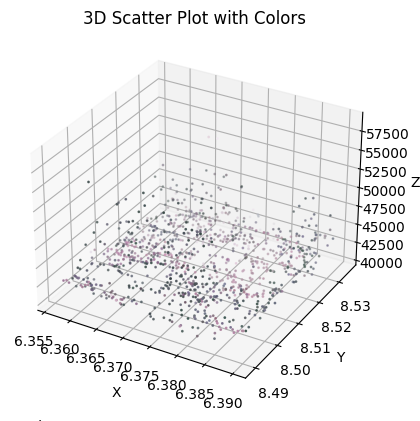



**file : data/simple.laz**

- *shape* : (1065, 19)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time', 'red', 'green', 'blue'],
      dtype='object')

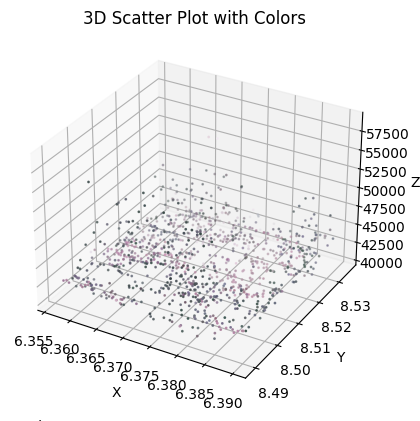



**file : data/simple1_1.las**

- *shape* : (1065, 16)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time'],
      dtype='object')

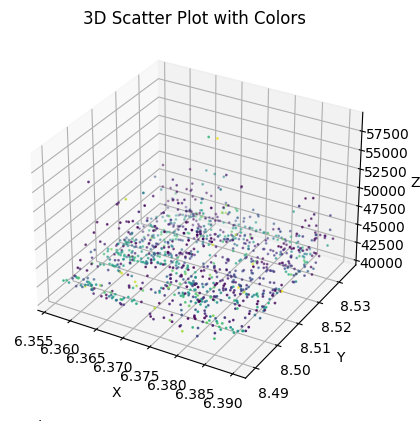



**file : data/simple1_3.las**

- *shape* : (999, 23)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time', 'wavepacket_index', 'wavepacket_offset',
       'wavepacket_size', 'return_point_wave_location', 'x_t', 'y_t', 'z_t'],
      dtype='object')

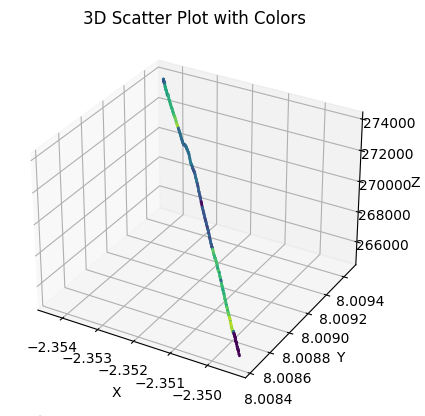



**file : data/simple1_4.las**

- *shape* : (22600, 21)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'user_data', 'scan_angle', 'point_source_id', 'gps_time', 'red',
       'green', 'blue'],
      dtype='object')



**not going as intensity.std=0**

**file : data/simple_with_page.copc.laz**

- *shape* : (1065, 21)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'user_data', 'scan_angle', 'point_source_id', 'gps_time', 'red',
       'green', 'blue'],
      dtype='object')

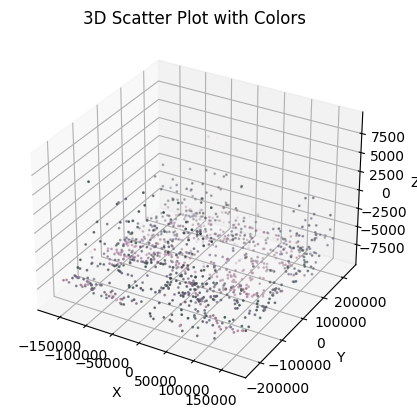



**file : data/test1_4.las**

- *shape* : (1000, 18)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'user_data', 'scan_angle', 'point_source_id', 'gps_time'],
      dtype='object')

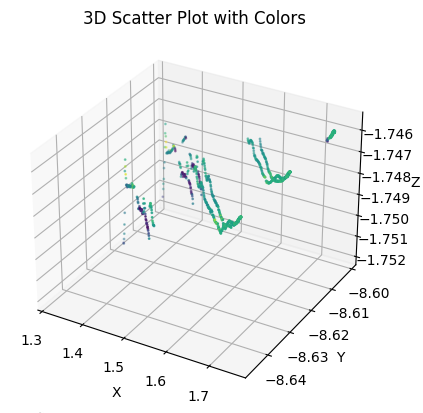



**file : data/unregistered_extra_bytes.las**

- *shape* : (4, 19)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'user_data', 'scan_angle', 'point_source_id', 'gps_time', 'ExtraBytes'],
      dtype='object')



**not going as intensity.std=0**

**file : data/vegetation_1_3.las**

- *shape* : (10683, 16)

- *columns* : Index(['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns',
       'scan_direction_flag', 'edge_of_flight_line', 'classification',
       'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data',
       'point_source_id', 'gps_time'],
      dtype='object')

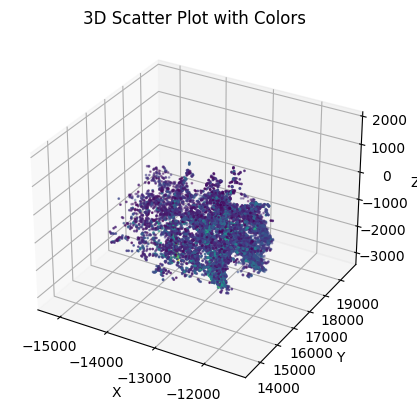

In [155]:
import laspy #pip install laspy[lazrs,laszip]
import pandas as pd #pip install pandas
from pathlib import Path
folder_path = Path("data") 
output_folder_path = Path("output") 
output_folder_path.mkdir(exist_ok=True)

def las_to_csv(input_file, output_file):
    las = laspy.read(input_file)
    points = pd.DataFrame({key:list(getattr(las, key)) for key in las._points.point_format.dimension_names })
    print(f"**file : {input_file}**")
    print(f"- *shape* : {points.shape}")
    print(f"- *columns* : {points.columns}")
    show()
    if points.intensity.std()==0: 
      print("**not going as intensity.std=0**")
      return
    show_3d_with_colors(points)
    points.to_csv(output_file, index=False)
    

# las_to_csv('data/simple1_4.las', 'output/output.csv')
# las_to_csv('data/simple.laz', 'output/output.csv')


for file_path in folder_path.iterdir():
    # print(f"file: {file_path}")
    if file_path.is_file() and file_path.suffix in [".las", ".laz"]:
      # csv_file_path = file_path.with_suffix(".csv")
      las_to_csv(file_path, f'output/{file_path.stem}.csv')


### check wheter the files are saved

In [119]:
! ls output -lS

total 15938
-rw------- 1 root root 9378923 Jun 10 00:05 autzen_trim.csv
-rw------- 1 root root 1768529 Jun 10 00:05 file_with_both_wkt_and_geotiff_vlrs.csv
-rw------- 1 root root 1756046 Jun 10 00:05 plane.csv
-rw------- 1 root root 1723784 Jun 10 00:05 simple1_4.csv
-rw------- 1 root root  688961 Jun 10 00:05 vegetation_1_3.csv
-rw------- 1 root root  140317 Jun 10 00:05 simple1_3.csv
-rw------- 1 root root  138843 Jun 10 00:05 extrabytes.csv
-rw------- 1 root root  138843 Jun 10 00:05 extra.csv
-rw------- 1 root root   92480 Jun 10 00:05 simple.copc.csv
-rw------- 1 root root   92480 Jun 10 00:05 simple_with_page.copc.csv
-rw------- 1 root root   90435 Jun 10 00:05 simple.csv
-rw------- 1 root root   86146 Jun 10 00:04 1_4_w_evlr.csv
-rw------- 1 root root   86146 Jun 10 00:05 test1_4.csv
-rw------- 1 root root   78725 Jun 10 00:05 simple1_1.csv
-rw------- 1 root root   38210 Jun  9 22:10 output.csv
-rw------- 1 root root    7997 Jun 10 00:04 autzen.csv
-rw------- 1 root root    7997

### check a file saved

In [120]:
pd.read_csv("output/autzen_trim.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    110000 non-null  int64  
 1   Y                    110000 non-null  int64  
 2   Z                    110000 non-null  int64  
 3   intensity            110000 non-null  int64  
 4   return_number        110000 non-null  int64  
 5   number_of_returns    110000 non-null  int64  
 6   scan_direction_flag  110000 non-null  int64  
 7   edge_of_flight_line  110000 non-null  int64  
 8   classification       110000 non-null  int64  
 9   synthetic            110000 non-null  int64  
 10  key_point            110000 non-null  int64  
 11  withheld             110000 non-null  int64  
 12  scan_angle_rank      110000 non-null  int64  
 13  user_data            110000 non-null  int64  
 14  point_source_id      110000 non-null  int64  
 15  gps_time         

# clean environment (**Attention** that will delete the created files ! las, laz, csv)

## remove the csv files

In [ ]:
! rm -r output

## remove the las/laz files

In [ ]:
! rm -r data 

## remove utils

In [ ]:
! rm markdown_printer.py

# Authors

Hermann Agossou